

---

# Machine Learning Lab III - Group #51

#### Venkata Naga Sravani Jogiparthi
#### Divya Jyothi Rao - 0749349
#### Mohit Kumar - 0749349


---



---




# Importing all required packages

In [1]:
from skimage import io #package used to read images
import os #package used to read files and access directories
import cv2
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img #package for importing the image data generator and immage to array converter and vice versa
from keras_preprocessing import image
from google.colab import drive # package required to mount our google drive onto google colab for data accessibility

drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

Mounted at /content/drive


Text(0.5, 1.0, 'Zebra')

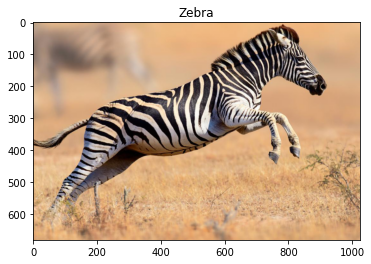

In [2]:
#Our object of interst here is to identify zebras

zebra_img = load_img('/content/drive/MyDrive/ML_Lab3/test_set/zebra_15/myz.jpg')
plt.imshow(zebra_img)
plt.title('Zebra')

In [3]:
par_dir = '/content/drive/MyDrive/ML_Lab3' #Creating an object of the parent directory
#print(len(os.listdir(par_dir))
os.listdir(par_dir) #Verifying the contents of our parent directory

['train_set', 'test_set', 'val_set', 'generated_images']

In [4]:
# Creating objects for our test, train and validation data paths to objectes
train_path = '/content/drive/MyDrive/ML_Lab3/train_set'
test_path = '/content/drive/MyDrive/ML_Lab3/test_set'
val_path = '/content/drive/MyDrive/ML_Lab3/val_set'

In [5]:
os.listdir(train_path) #Verifying the content of each directory

['zebra_50', 'not_zebra_50']

# Dataset Verification

In [6]:
print("Training set =", len(os.listdir(os.path.join(train_path, 'zebra_50'))) + len(os.listdir(os.path.join(train_path, 'not_zebra_50'))))
print("Test set =", len(os.listdir(os.path.join(test_path, 'zebra_15'))) + len(os.listdir(os.path.join(test_path, 'not_zebra_15'))))
print("Val set =", len(os.listdir(os.path.join(val_path, 'zebra_15'))) + len(os.listdir(os.path.join(val_path,'not_zebra_15'))))

Training set = 100
Test set = 30
Val set = 30


# Dataset Loading and Processing with Image Data Generators

In [7]:
#Rescaling the images
train_img_gen = ImageDataGenerator(rescale=1/255)
test_img_gen = ImageDataGenerator(rescale=1/255)
val_img_gen = ImageDataGenerator(rescale=1/255)

In [8]:
# Resizing the images from the test, train and validation set using into 148 by 148 pixels using flow_from_directory function

train_img_gen = train_img_gen.flow_from_directory(train_path, #flow_from_directory function is being used to allow the machine to take images in batches and  
                                  target_size=(148, 148),     #then perform activities such as resizing and augmentation. Batcg size is set to 10.
                                  class_mode = 'binary',
                                  batch_size=10)

test_img_gen = test_img_gen.flow_from_directory(test_path,
                                 target_size = (148,148),
                                 class_mode = 'binary',
                                 batch_size=7)

val_img_gen = val_img_gen.flow_from_directory(val_path,
                                target_size = (148, 148),
                                class_mode = 'binary',
                                batch_size=7)

print(train_img_gen.class_indices)

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
{'not_zebra_50': 0, 'zebra_50': 1}


1.0


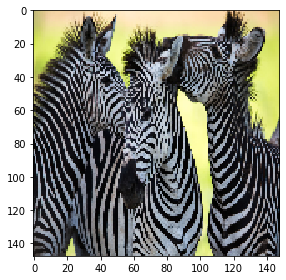

0.0


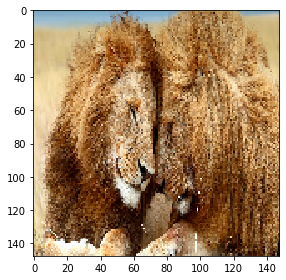

0.0


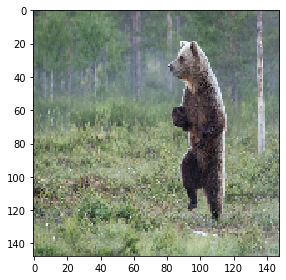

0.0


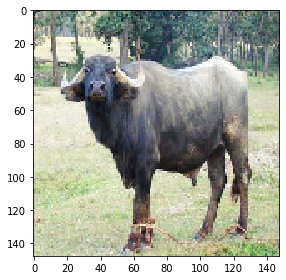

1.0


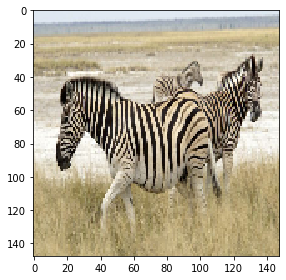

1.0


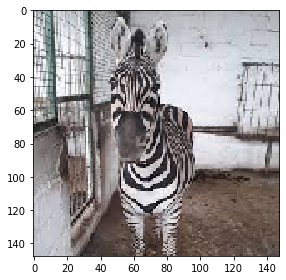

0.0


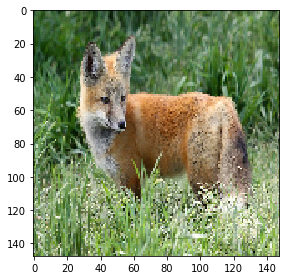

0.0


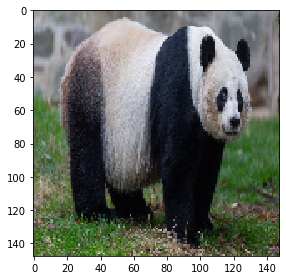

1.0


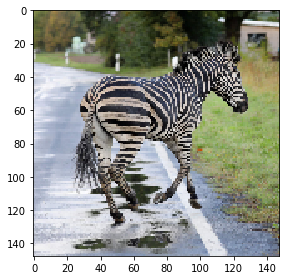

1.0


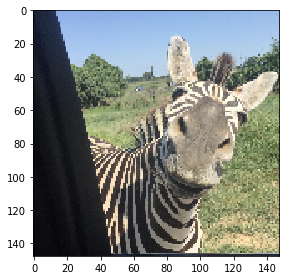

In [9]:
#Function to print the images
image_array,label = train_img_gen.next()  #.next function is used here to fetch the proceeding file to the iterator and returns the next input line

def show_img(img):
  io.imshow(img)
  io.show()

for i in range(0, len(label)):
  img=image_array[i]
  print(label[i])
  show_img(img)

In [10]:
image_array.shape

(10, 148, 148, 3)

In [11]:
label.shape

(10,)

In [12]:
print(len(label))
print(len(image_array))

10
10


# Create and Evaluate a Model

In [13]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization

Epoch 1/10
10/10 [==============================] - 4s 357ms/step - loss: 32.3972 - accuracy: 0.4900 - val_loss: 0.6197 - val_accuracy: 0.5714
Epoch 2/10
10/10 [==============================] - 3s 338ms/step - loss: 0.7009 - accuracy: 0.6400 - val_loss: 0.5125 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 3s 332ms/step - loss: 0.5902 - accuracy: 0.7500 - val_loss: 0.5305 - val_accuracy: 0.8571
Epoch 4/10
10/10 [==============================] - 3s 332ms/step - loss: 0.3968 - accuracy: 0.8100 - val_loss: 0.9930 - val_accuracy: 0.6190
Epoch 5/10
10/10 [==============================] - 3s 320ms/step - loss: 0.5055 - accuracy: 0.8000 - val_loss: 0.5537 - val_accuracy: 0.7143
Epoch 6/10
10/10 [==============================] - 3s 327ms/step - loss: 0.5578 - accuracy: 0.8100 - val_loss: 1.6580 - val_accuracy: 0.5238
Epoch 7/10
10/10 [==============================] - 3s 329ms/step - loss: 0.2393 - accuracy: 0.9200 - val_loss: 0.1292 - val_accuracy: 0.9524
Epoch

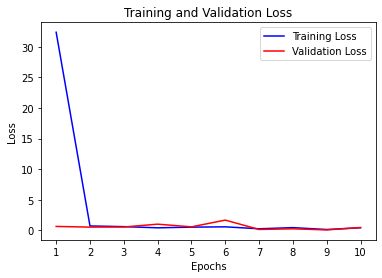

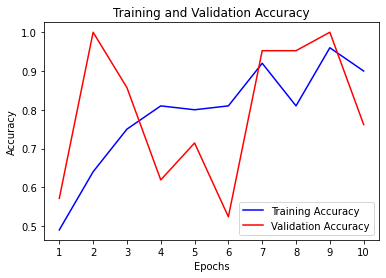

In [16]:
#Building our neural network and training it with our training set which are not augmented yet

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.regularizers import l2

convnet = Sequential([
            Conv2D(filters=32,
                   kernel_size=(2,2),
                   strides=1,
                   activation='relu', #using RelU activation function
                   input_shape=(148,148,3)),
                          
            Conv2D(filters=32,
                   kernel_size=(2,2),
                   strides=1,
                   activation='relu'),
            MaxPooling2D(pool_size=(2,2),
                         strides=1
                         ),
            Dropout(0.2),   # using drop out regularization
            Conv2D(filters=64,
                   kernel_size=(2,2),
                   strides=1,
                   activation='relu'),
            MaxPooling2D(pool_size=(2,2),
                         strides=1
                         ),
            Conv2D(filters=64,
                   kernel_size=(2,2),
                   strides=1,
                   activation='relu'),
            MaxPooling2D(pool_size=(2,2),
                         strides=1,
                         ),
            Flatten(),
            Dense(128, activation='relu'), 
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
            ])

#Compiling the network
convnet.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

#Fitting the data to our Model
training_img = 100
batch_size = 10
validation_img = 30

convnet_train = convnet.fit_generator(train_img_gen, epochs=10, steps_per_epoch = training_img//batch_size,
                                      validation_steps = validation_img//batch_size, validation_data = val_img_gen)

#Plotting the accuracies

convnet_train.history.keys()
import matplotlib.pyplot as plt  # needed to create our plot

convnet_dict = convnet_train.history # the dictionary that has the information on loss and accuracy per epoch
print(convnet_dict)

loss_values = convnet_dict['loss']   # training loss
val_loss_values = convnet_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

acc_values = convnet_dict['accuracy']
val_acc_values = convnet_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
# Evaluate the model using test data

convnet_score = convnet.evaluate(test_img_gen, batch_size=1)
print("\n Test Loss:\n " + str(convnet_score[0]))
print("\n Test Accuracy:" + str(convnet_score[1]*100) + "%")

5/5 [==============================] - 5s 997ms/step - loss: 0.9826 - accuracy: 0.7667

 Test Loss:
 0.982577383518219

 Test Accuracy:76.66666507720947%


# Using Data Augmentation

### Data Verification

In [18]:
print("Train set =", len(os.listdir(os.path.join(train_path, 'zebra_50'))) + len(os.listdir(os.path.join(train_path, 'not_zebra_50'))))
print("Test set =", len(os.listdir(os.path.join(test_path, 'zebra_15'))) + len(os.listdir(os.path.join(test_path, 'not_zebra_15'))))
print("Val set =", len(os.listdir(os.path.join(val_path, 'zebra_15'))) + len(os.listdir(os.path.join(val_path,'not_zebra_15'))))

Train set = 100
Test set = 30
Val set = 30


In [19]:
print(os.listdir(train_path))
print(os.listdir(test_path))
print(os.listdir(val_path))
print(os.listdir('/content/drive/MyDrive/ML_Lab3/generated_images'))

['zebra_50', 'not_zebra_50']
['zebra_15', 'not_zebra_15']
['zebra_15', 'not_zebra_15']
['zebra_0_721.jpeg', 'zebra_0_2245.jpeg', 'zebra_0_7500.jpeg', 'zebra_0_2990.jpeg', 'zebra_0_9789.jpeg', 'zebra_0_9888.jpeg', 'zebra_0_8964.jpeg', 'zebra_0_8943.jpeg', 'zebra_0_1574.jpeg', 'zebra_0_8822.jpeg', 'zebra_0_6796.jpeg', 'zebra_0_2065.jpeg', 'zebra_0_6352.jpeg', 'zebra_0_4156.jpeg', 'zebra_0_1348.jpeg', 'zebra_0_9809.jpeg', 'zebra_0_9001.jpeg', 'zebra_0_3479.jpeg', 'zebra_0_6106.jpeg', 'zebra_0_6876.jpeg', 'zebra_0_4313.jpeg', 'zebra_0_9838.jpeg', 'zebra_0_4622.jpeg', 'zebra_0_4357.jpeg', 'zebra_0_2643.jpeg', 'zebra_0_2944.jpeg', 'zebra_0_9177.jpeg', 'zebra_0_7412.jpeg', 'zebra_0_9613.jpeg', 'zebra_0_5421.jpeg', 'zebra_0_8299.jpeg', 'zebra_0_2368.jpeg', 'zebra_0_6159.jpeg', 'zebra_0_5797.jpeg', 'zebra_0_6795.jpeg', 'zebra_0_6779.jpeg', 'zebra_0_3578.jpeg', 'zebra_0_4643.jpeg', 'zebra_0_9688.jpeg', 'zebra_0_2556.jpeg', 'zebra_0_2129.jpeg', 'zebra_0_9997.jpeg', 'zebra_0_7431.jpeg', 'zebra_0_7

### Dataset Loading and Processing with Create Image Data Generators

### Add Data Augmentation

In [20]:
#Augmenting our train set images using data augmentation

train_img_gen_aug_1 = ImageDataGenerator(rescale=1/255,  #By applying augmentation, the model gets to see diversified data since the augmentation function slightly modifying 
                                         rotation_range=50,  # them such as cropping, padding or flipping them horizontallyand vertically. Furthermore, it is also used to cater to class 
                                         zca_epsilon=1e-06,  #imbalance problem. This process helps the model to learn better therefore, increasing the model accuracy. 
                                         zca_whitening=False,
                                         width_shift_range=0.4, 
                                         fill_mode='nearest',
                                         horizontal_flip=True, 
                                         vertical_flip=True,
                                       shear_range=0.5, 
                                       zoom_range=0.3)
test_img_gen = ImageDataGenerator(rescale=1/255)
val_img_gen = ImageDataGenerator(rescale=1/255)

In [21]:
train_img_gen_aug = train_img_gen_aug_1.flow_from_directory(train_path,
                                  target_size=(148, 148),
                                  class_mode = 'binary',
                                  batch_size=10)

test_img_gen = test_img_gen.flow_from_directory(test_path,
                                 target_size = (148,148),
                                 class_mode = 'binary',
                                 batch_size=7)

val_img_gen = val_img_gen.flow_from_directory(val_path,
                                target_size = (148, 148),
                                class_mode = 'binary',
                                batch_size=7)

print(train_img_gen.class_indices)

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
{'not_zebra_50': 0, 'zebra_50': 1}


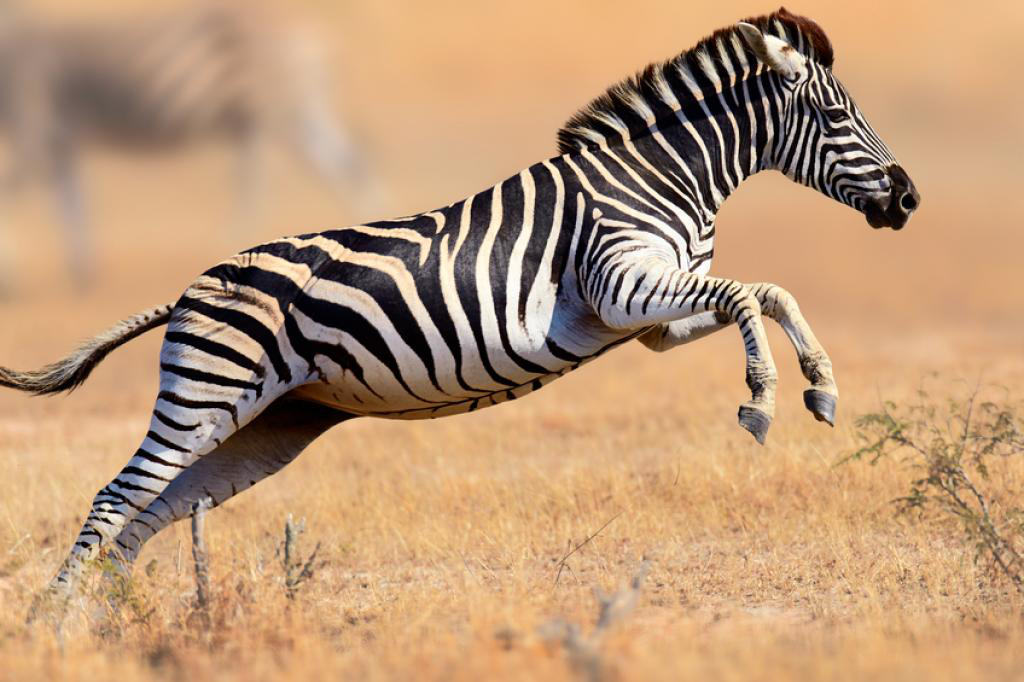

In [22]:
load_img('/content/drive/MyDrive/ML_Lab3/test_set/zebra_15/myz.jpg')

In [23]:
zeb = load_img('/content/drive/MyDrive/ML_Lab3/test_set/zebra_15/myz.jpg', target_size=(148,148))
zeb = img_to_array(zeb)
print(zeb.shape)
zeb = zeb.reshape((1,) + zeb.shape) #adding an extra dimension to our image
print(zeb.shape)

(148, 148, 3)
(1, 148, 148, 3)


In [24]:
gen_img = '/content/drive/MyDrive/ML_Lab3/generated_images'

In [25]:
c=0

for i in train_img_gen_aug_1.flow(zeb,save_to_dir= gen_img, save_format='jpeg', save_prefix='zebra', batch_size=1):

  c=c+1
  
  if c==5:
    break

print("5 Images created in Generated Images Folder")

5 Images created in Generated Images Folder


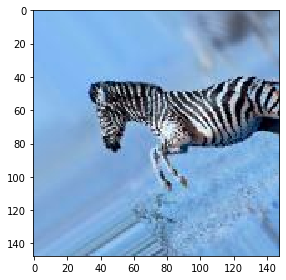

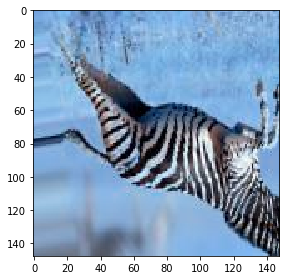

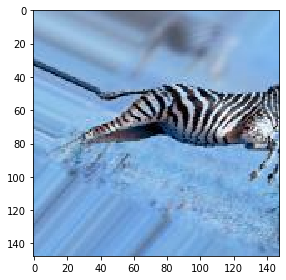

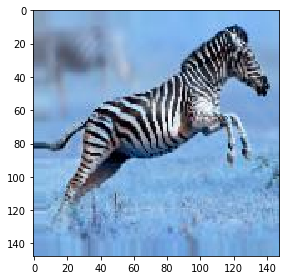

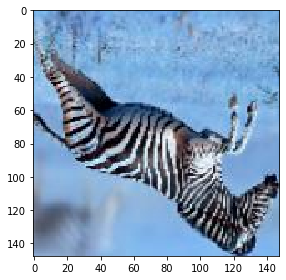

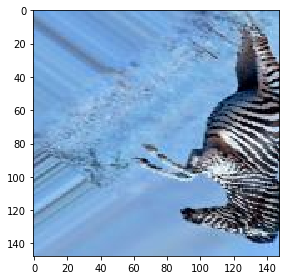

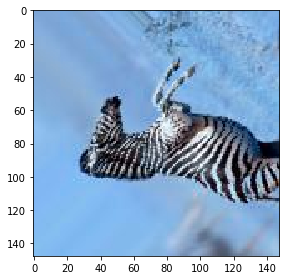

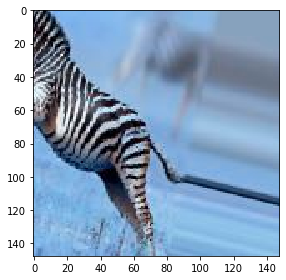

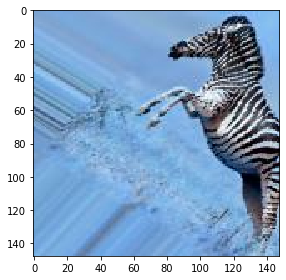

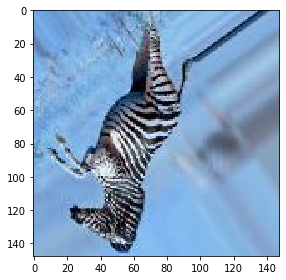

In [26]:
# Augmenting and printing out several versions of a single image

def print_img(img):
  io.imshow(img)
  io.show()
cnt=0
for img_file in os.listdir(gen_img):
  img=cv2.imread(os.path.join(gen_img,img_file))
  print_img(img)
  cnt+=1
  if cnt==10:
    break

# Create and Evaluate a Baseline Model

In [27]:
#Training our model on the augmented training set
convnet_train = convnet.fit_generator(train_img_gen_aug, epochs=9, steps_per_epoch = training_img//batch_size,
                                      validation_steps = validation_img//batch_size, validation_data = val_img_gen)

Epoch 1/9
10/10 [==============================] - 4s 385ms/step - loss: 0.5341 - accuracy: 0.7600 - val_loss: 0.3508 - val_accuracy: 0.8571
Epoch 2/9
10/10 [==============================] - 4s 362ms/step - loss: 0.5098 - accuracy: 0.8000 - val_loss: 0.2586 - val_accuracy: 0.9048
Epoch 3/9
10/10 [==============================] - 4s 366ms/step - loss: 0.8366 - accuracy: 0.7800 - val_loss: 1.0099 - val_accuracy: 0.6667
Epoch 4/9
10/10 [==============================] - 4s 369ms/step - loss: 0.3926 - accuracy: 0.7600 - val_loss: 0.6729 - val_accuracy: 0.7619
Epoch 5/9
10/10 [==============================] - 4s 360ms/step - loss: 0.4641 - accuracy: 0.8000 - val_loss: 0.9466 - val_accuracy: 0.7143
Epoch 6/9
10/10 [==============================] - 4s 369ms/step - loss: 0.8393 - accuracy: 0.8100 - val_loss: 0.4657 - val_accuracy: 0.7619
Epoch 7/9
10/10 [==============================] - 4s 377ms/step - loss: 0.4268 - accuracy: 0.8700 - val_loss: 0.3397 - val_accuracy: 0.8095
Epoch 8/9
10/

{'loss': [0.5340848565101624, 0.5098168849945068, 0.8365750312805176, 0.3925740420818329, 0.4640531837940216, 0.8392979502677917, 0.42682549357414246, 0.6471070647239685, 0.6748133897781372], 'accuracy': [0.7599999904632568, 0.800000011920929, 0.7799999713897705, 0.7599999904632568, 0.800000011920929, 0.8100000023841858, 0.8700000047683716, 0.800000011920929, 0.7599999904632568], 'val_loss': [0.3507796823978424, 0.25860100984573364, 1.0099172592163086, 0.6729406714439392, 0.9465538859367371, 0.4657036364078522, 0.33965879678726196, 1.0412763357162476, 0.5991104245185852], 'val_accuracy': [0.8571428656578064, 0.9047619104385376, 0.6666666865348816, 0.761904776096344, 0.7142857313156128, 0.761904776096344, 0.8095238208770752, 0.7142857313156128, 0.7142857313156128]}


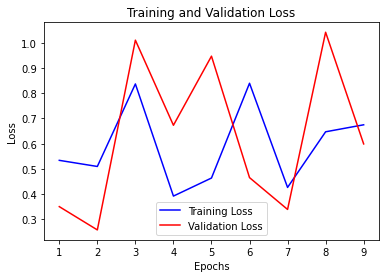

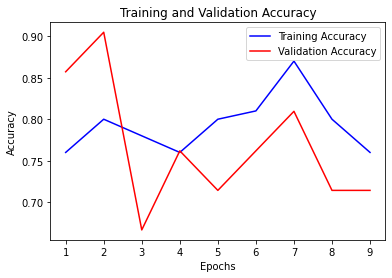

In [28]:
#Plotting the accuracies

convnet_train.history.keys()
import matplotlib.pyplot as plt  # needed to create our plot

convnet_dict = convnet_train.history # the dictionary that has the information on loss and accuracy per epoch
print(convnet_dict)

loss_values = convnet_dict['loss']   # augmented training loss
val_loss_values = convnet_dict['val_loss'] # augmented validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

acc_values = convnet_dict['accuracy']
val_acc_values = convnet_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
# Evaluating the model using test data after training it with the augmented training set

convnet_score = convnet.evaluate(test_img_gen, batch_size=1)
print("\n Test Loss:\n " + str(convnet_score[0]))
print("\n Test Accuracy:" + str(convnet_score[1]*100) + "%")

5/5 [==============================] - 0s 90ms/step - loss: 0.7876 - accuracy: 0.8000

 Test Loss:
 0.7875646352767944

 Test Accuracy:80.0000011920929%
